# Introducción a los vectores

En esta sección veremos como representar puntos y vectores en dos dimensiones, así como sus propiedades y las operaciones más comunes.

In [1]:
# Primero vamos a importar las bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## El Punto

Un punto se representa por un vector, $\mathbf{P} \in \mathbb{E}^n$, donde $\mathbb{E}$ es un espacio Euclidiano y $n$ es el número de dimensiones.

Por ejemplo, en un espacio Euclidiano bidimensional ($\mathbb{E}^2$), un punto $\mathbf{P} = (x, y)$ viene representado por dos coordenadas. Una horizontal ($x$) y otra vertical ($y$).

In [2]:
P = np.array([1, 2])

print(f"P = {P}")

P = [1 2]


Las coordenadas aquí vienen dadas por un array, así que si ```P=[x,y]```, ```x = P[0]```, ```y = P[1]```.
Vamos a crear una función llamada ```crearRejilla``` para dibujar los puntos en la pantalla.

In [3]:
def crearRejilla(title='$\mathbb{E}^2', rango=[-3, 3, -3, 3]):
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title(title)
    plt.axis(rango)  # Define los límites de los ejes [xmin, xmax, ymin, ymax]
    plt.grid(True)  # Mostrar cuadrícula

Dibujamos el punto en la rejilla de color rojo y con forma de punto relleno:

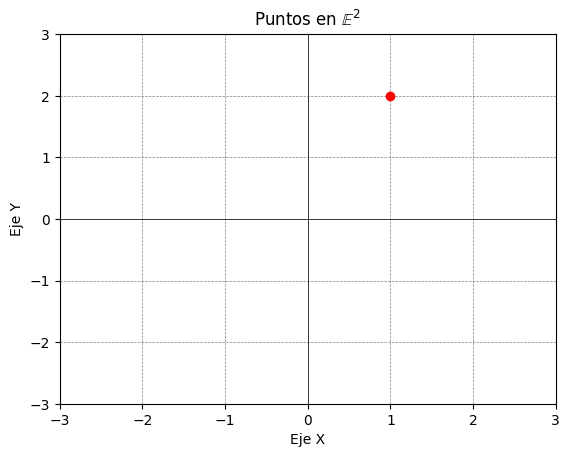

In [4]:
crearRejilla('Puntos en $\mathbb{E}^2$')
plt.plot(P[0], P[1], 'ro')
plt.show()


### Distancia entre dos puntos

La distancia entre dos puntos ($\mathbf{A}$ y $\mathbf{B}$) se calcula como la norma de la resta de ambos puntos:

$$
d = \| \mathbf{A} - \mathbf{B} \|
$$

O lo que es lo mismo:

$$
d = \sqrt{(\mathbf{A}_{x}-\mathbf{B}_{x})^2 + (\mathbf{A}_{y}-\mathbf{B}_{y})^2}
$$

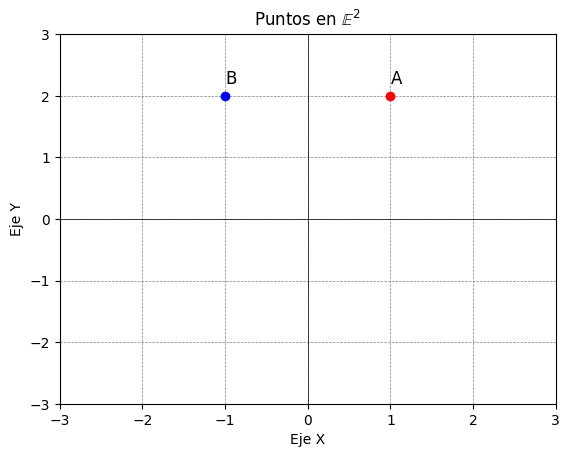

La distancia entre A y B es [2.82842712 0.        ]


In [5]:
A = np.array([1, 2])
B = np.array([-1, 2])

# Ahorramos algo de código con esta función
def dibujaAyB(A, B):
    plt.plot(A[0], A[1], 'ro')
    plt.text(A[0], A[1] * 1.1 , "A", fontsize=12)
    plt.plot(B[0], B[1], 'bo')
    plt.text(B[0], B[1] * 1.1 , "B", fontsize=12)

crearRejilla('Puntos en $\mathbb{E}^2$')
dibujaAyB(A, B)
plt.show()

d = np.sqrt((A - B)**2+(A - B)**2)
print(f"La distancia entre A y B es {d}")

## Vectores

La resta de dos puntos ($\mathbf{A}$ y $\mathbf{B}$) nos da un vector ($\vec{v}$):

$$
\vec{v} = \mathbf{v} = \mathbf{B} - \mathbf{A}
$$

Habrás visto que hay dos formas habituales de escribir vectores, una con la flecha encima, la otra notación es usando negrita (esta última es la más habitual en gráficos).

Fíjate también que el orden al restar los puntos afecta al resultado:

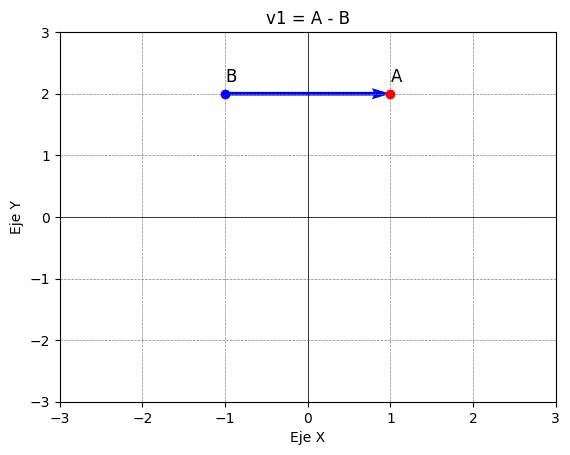

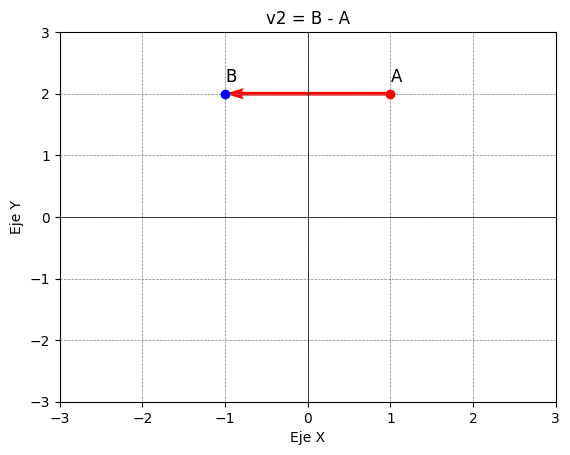

In [6]:
v1 = A - B
v2 = B - A

crearRejilla('v1 = A - B')
dibujaAyB(A,B)
plt.quiver(B[0], B[1], v1[0], v1[1], angles='xy', scale=1, scale_units='xy', color='blue')
plt.show()

crearRejilla('v2 = B - A')
dibujaAyB(A,B)
plt.quiver(A[0], A[1], v2[0], v2[1], angles='xy', scale=1, scale_units='xy', color='red')
plt.show()

## Módulo de un vector

El tamaño de un vector viene dado por su **módulo**. En dos dimensiones, la fórmula para el módulo del vector es $|\mathbf{v}| = \sqrt{\mathbf{v}_x^2 + \mathbf{v}_y^2}$.

En $n$ dimensiones, la fórmula general para el módulo del vector es:
$|\mathbf{v}| = \sqrt{\mathbf{v}_1^2 + \mathbf{v}_2^2 + \ldots + \mathbf{v}_n^2}$

Donde $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n$ son las componentes del vector $\mathbf{v}$ en las $n$ dimensiones correspondientes.

In [7]:
modulo_v1 = np.sqrt(v1[0]**2+v2[1]**2)
print(f"El módulo de v1 vale {modulo_v1}")

# En numpy tenemos una función que calcula lo mismo
modulo_v1 = np.linalg.norm(v1)
print(f"También se puede calcular el módulo de v1 con numpy {modulo_v1}")

El módulo de v1 vale 2.0
También se puede calcular el módulo de v1 con numpy 2.0


En gráficos, todas las direcciones se fuerzan para que tengan módulo 1 y estén centradas en el origen. Es lo que viene a llamarse un **vector unitario**, o más comúnmente llamado **vector normalizado**.

Si queremos saber la dirección que apunta a $v$, solamente hay que normalizar el vector, o lo que es lo mismo, dividir por su tamaño: 

$\vec{d_P}$ = $\hat{\mathbf{v}} = \mathbf{v}/ \| \mathbf{v} \|$

In [8]:
v1_normalizado = v1/modulo_v1

print(v1_normalizado)

[1. 0.]


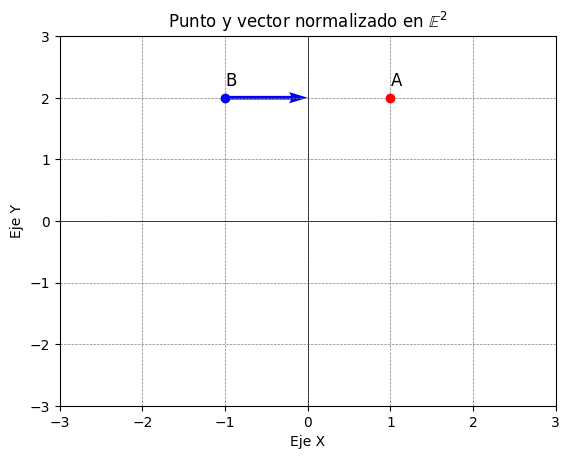

In [9]:
crearRejilla('Punto y vector normalizado en $\mathbb{E}^2$')
dibujaAyB(A,B)
plt.quiver(B[0], B[1], v1_normalizado[0], v1_normalizado[1], angles='xy', scale=1, scale_units='xy', color='b', label='Vector')
plt.show()

## Multiplicación escalar de vectores

La multiplicación escalar entre dos vectores se calcula como:

$$
\mathbf {a} \cdot \mathbf {b} =\sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n}
$$

Esta operación nos permite calcular el ángulo entre vectores. Concretamente, dados dos vectores $\mathbf{a}$ y $\mathbf{b}$, podemos obtener el ángulo a partir de esta ecuación:

$\cos(\theta) = \frac{{\mathbf{a} \cdot \mathbf{b}}}{{\| \mathbf{a} \| \cdot \| \mathbf{b} \|}}$

Esta ecuación será muy importante en gráficos, ya que permite para muchas operaciones comunes. Fíjate, que si los dos vectores están normalizados (como será nuestro caso con direcciones) la ecuación anterior se simplifica:

$$
\cos(\theta) = {\mathbf{a} \cdot \mathbf{b}}
$$

o lo que es lo mismo:

$$
\theta = \arccos({\mathbf{a} \cdot \mathbf{b}})
$$

In [10]:
modulo_v1 = np.linalg.norm(v1)
modulo_v2 = np.linalg.norm(v2)
cosT = np.dot(v1, v2)/(modulo_v1*modulo_v2)

print("cos(T) =", cosT)
print("arccos(T) =", np.arccos(cosT)/np.pi*180)

cos(T) = -1.0
arccos(T) = 180.0


Recordemos las direcciones de nuestros vectores:

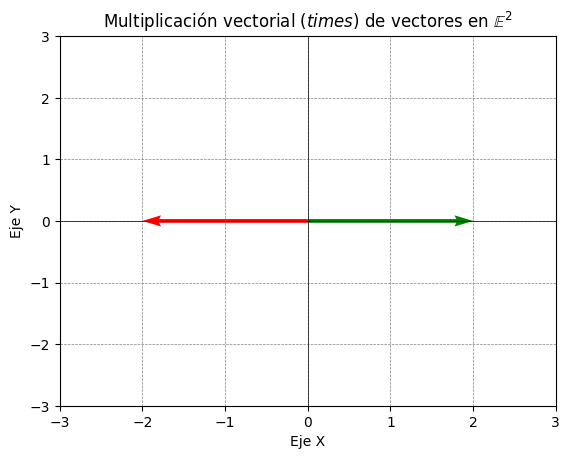

In [11]:
crearRejilla('Multiplicación vectorial ($times$) de vectores en $\mathbb{E}^2$')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale=1, scale_units='xy', color='g')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale=1, scale_units='xy', color='r')

plt.show()

Fíjate que pasa cuando ambos vectores apuntan al mismo sitio:

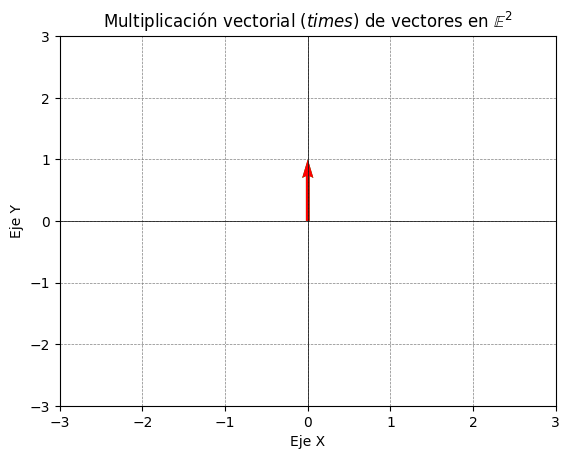

cos(T) = 1
arccos(T) = 0.0


In [12]:
v1 = np.array([0, 1])
v2 = np.array([0, 1])

crearRejilla('Multiplicación vectorial ($times$) de vectores en $\mathbb{E}^2$')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale=1, scale_units='xy', color='g', label='Vector')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale=1, scale_units='xy', color='r', label='Vector')

plt.show()

cosT = np.dot(v1, v2)

print("cos(T) =", cosT)
print("arccos(T) =", np.arccos(cosT)/np.pi*180)

Y cuando apuntan en dirección perpendicular:

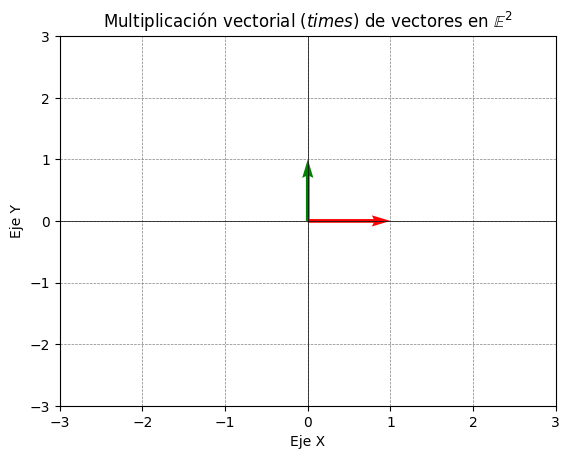

cos(T) = 0
arccos(T) = 90.0


In [13]:
v1 = np.array([0, 1])
v2 = np.array([1, 0])

crearRejilla('Multiplicación vectorial ($times$) de vectores en $\mathbb{E}^2$')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale=1, scale_units='xy', color='g', label='Vector')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale=1, scale_units='xy', color='r', label='Vector')

plt.show()

cosT = np.dot(v1, v2)

print("cos(T) =", cosT)
print("arccos(T) =", np.arccos(cosT)/np.pi*180)

Estas propiedades se utilizan mucho en la iluminación o a la hora de construir objetos geométricos complejos (por ejemplo con objetos solevados), pero también a la hora de saber a donde mira un NPC, saber posicionar elementos encima de un terreno irregular, etc.

## Desplazamiento de un punto sobre un vector

Un punto puede desplazarse en una dirección utilizando una dirección. 

Por ejemplo, tomemos el punto $\mathbf{P}=(1,2)$ y el vector  $\vec{v}=(1,1)$, y vamos a desplazar el punto 5 unidades en la dirección de $\vec v$. Para ello debemos normalizar $\vec v$ y calcular:

$\mathbf{P}' = \mathbf{P} + 5 \cdot \vec v$

In [14]:
P = np.array([1,2], dtype=np.float32)
v = np.array([1,1], dtype=np.float32)
# normalizamos v
v /= np.linalg.norm(v)
P_new = P + 5 * v

Vamos a dibujar el resultado, la **x** es el destino del punto tras aplicar la transformación:

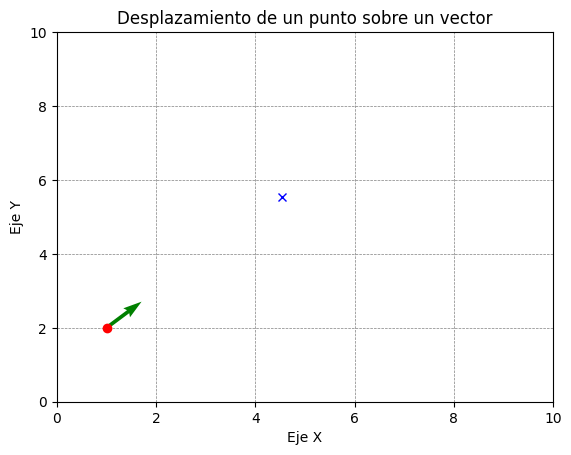

In [15]:
crearRejilla('Desplazamiento de un punto sobre un vector', [0,10, 0,10])
plt.quiver(P[0], P[1], v[0], v[1], angles='xy', scale=1, scale_units='xy', color='g', label='Vector')
plt.plot(P[0], P[1], 'ro')
plt.plot(P_new[0], P_new[1], 'bx')
plt.show()

No normalizar el vector nos llevaría a aumentar o disminuir el número de unidades recorridas:

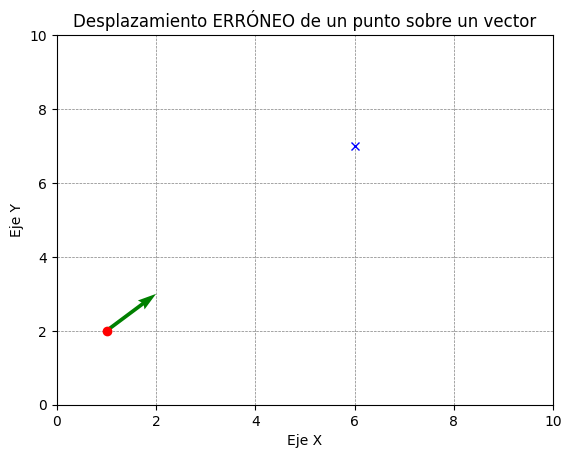

In [16]:
P = np.array([1,2], dtype=np.float32)
v = np.array([1,1], dtype=np.float32)
# no normalizamos v
P_new = P + 5 * v

crearRejilla('Desplazamiento ERRÓNEO de un punto sobre un vector', [0,10, 0,10])
plt.quiver(P[0], P[1], v[0], v[1], angles='xy', scale=1, scale_units='xy', color='g', label='Vector')
plt.plot(P[0], P[1], 'ro')
plt.plot(P_new[0], P_new[1], 'bx')
plt.show()

# Vectores 3D

Vamos a ver ahora el caso de los vectores 3D. Ahora tendremos un espacio Euclidiano tridimensional ($\mathbb{E}^3$), donde un punto $\mathbf{P} = (x, y, z)$ viene representado por tres coordenadas. Una horizontal ($x$), otra vertical ($y$) y otra en profundidad ($z$). 

In [17]:
P = np.array([1, 2, 3])

print(f"P = {P}")

P = [1 2 3]


Igual que antes, vamos a crear una función para poder dibujar gráficos 3D, esta vez llamada ```crearRejilla3D```:

In [18]:
def crearRejilla3D(title='$\mathbb{E}^3$', rango=[-3, 3, -3, 3, -3, 3]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(color='gray', linestyle='--', linewidth=0.25)
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.set_title(title)
    ax.set_xlim(rango[0], rango[1])
    ax.set_ylim(rango[2], rango[3])
    ax.set_zlim(rango[4], rango[5])
    ax.plot([0, 0], [0, 0], [rango[0], rango[1]], color='green', linewidth=0.5)
    ax.plot([0, 0], [rango[0], rango[1]], [0, 0], color='blue', linewidth=0.5)
    ax.plot([rango[0], rango[1]], [0, 0], [0, 0], color='red', linewidth=0.5)
    ax.grid(True)
    return fig, ax



Vamos a dibujar el punto:

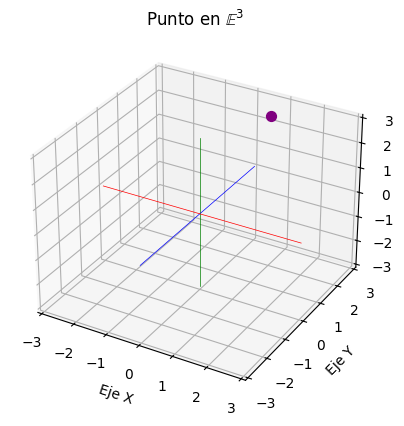

In [19]:
fig, ax = crearRejilla3D("Punto en $\mathbb{E}^3$")
ax.scatter(P[0], P[1], P[2], color='purple', s=50)
plt.show()

Las fórmulas son análogas, así que vamos a dibujar el vector de dirección que apunta a P (recuerda que las direcciones siempre deben normalizarse):

In [20]:
modulo_P = np.linalg.norm(P)
print("Módulo =", modulo_P)

d_P = P/modulo_P
print("Dirección =", d_P)

Módulo = 3.7416573867739413
Dirección = [0.26726124 0.53452248 0.80178373]


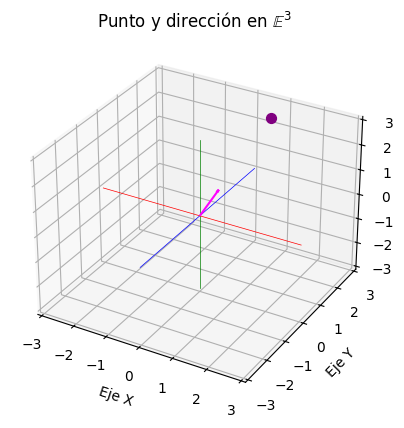

In [21]:
fig,ax = crearRejilla3D("Punto y dirección en $\mathbb{E}^3$")
ax.scatter(P[0], P[1], P[2], color='purple', s=50)
ax.quiver([0], [0], [0], d_P[0], d_P[1], d_P[2], color='magenta', arrow_length_ratio=0.1)

plt.show()

Vamos a rotar un poco la gráfica y hacer zoom. Para que se vea algo mejor, también generaremos dos vistas:

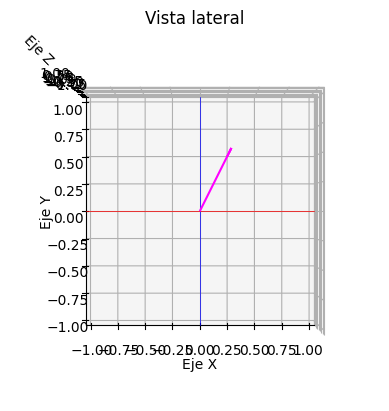

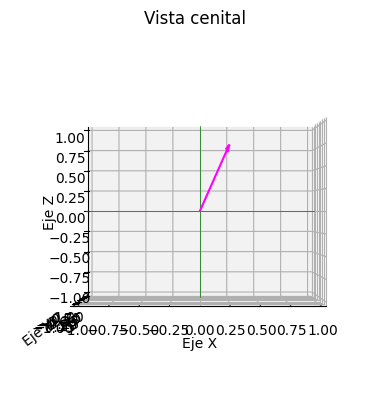

In [22]:
fig, ax = crearRejilla3D("Vista lateral", rango=[-1, 1, -1, 1, -1, 1])
ax.scatter(P[0], P[1], P[2], color='purple', s=50)
ax.quiver([0], [0], [0], d_P[0], d_P[1], d_P[2], color='magenta', arrow_length_ratio=0.1)
ax.view_init(elev=90, azim=-90)  # Elevación y ángulo azimutal
plt.show()

fig, ax = crearRejilla3D("Vista cenital", rango=[-1, 1, -1, 1, -1, 1])
ax.scatter(P[0], P[1], P[2], color='purple', s=50)
ax.quiver([0], [0], [0], d_P[0], d_P[1], d_P[2], color='magenta', arrow_length_ratio=0.1)
ax.view_init(elev=0, azim=-90)  # Elevación y ángulo azimutal
plt.show()

El producto escalar sigue vigente:

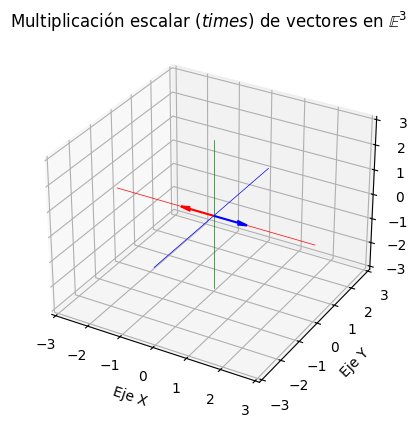

cos(T) = -1
arc(T) = 180.0


In [23]:
v1 = np.array([1, 0, 0])
v2 = np.array([-1, 0, 0])

crearRejilla3D('Multiplicación escalar ($times$) de vectores en $\mathbb{E}^3$')
plt.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', label='Vector')
plt.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', label='Vector')

plt.show()

cosT = np.dot(v1, v2)

print("cos(T) =", cosT)
print("arc(T) =", np.arccos(cosT)/np.pi*180)

Fíjate que además, cuanto más cercanos los vectores, más cercano a 1, igual que antes:

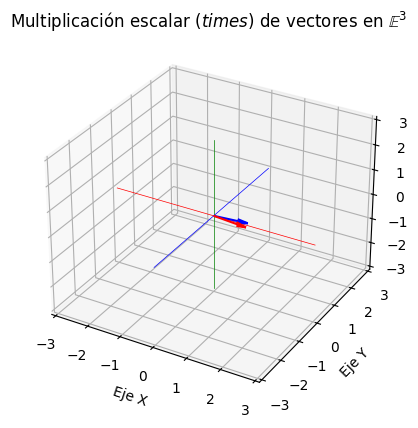

cos(T) = 0.990049751243781
arccos(T) = 8.089382470772563


In [24]:
v1 = np.array([1, 0.05, 0.05])
v2 = np.array([1, -0.05, -0.05])

# normalizamos los vectores
v1 = v1 / np.linalg.norm(v1)
v2 = v2 / np.linalg.norm(v2)

crearRejilla3D('Multiplicación escalar ($times$) de vectores en $\mathbb{E}^3$')
plt.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', label='Vector')
plt.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', label='Vector')

plt.show()

cosT = np.dot(v1, v2)

print("cos(T) =", cosT)
print("arccos(T) =", np.arccos(cosT)/np.pi*180)

### Producto vectorial

Veamos ahora el producto vectorial: 

El producto vectorial de dos vectores $\mathbf{v} = (v_x, v_y, v_z)$ y $\mathbf{w} = (w_x, w_y, w_z)$ en $\mathbb{R}^3$ se define como el vector:

$$
\mathbf{v} \times \mathbf{w} = \begin{pmatrix}
v_y w_z - v_z w_y \\
v_z w_x - v_x w_z \\
v_x w_y - v_y w_x
\end{pmatrix}
$$

La matriz asociada a este producto vectorial se puede escribir como:

$$
\mathbf{v} \times \mathbf{w} = \det \begin{pmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
v_x & v_y & v_z \\
w_x & w_y & w_z
\end{pmatrix}
$$

Donde $\mathbf{i}$, $\mathbf{j}$ y $\mathbf{k}$ son los vectores unitarios en las direcciones de los ejes x, y, y z respectivamente.


Pero lo que realmente nos importa es el significado geométrico. Siempre que multipliquemos dos vectores con el producto vectorial, obtendremos un tercer vector **perpendicular** a ambos vectores:

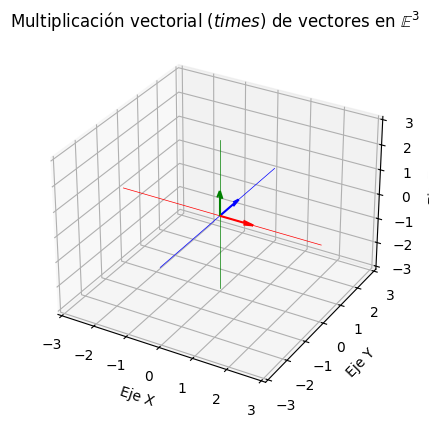

Vector resultante: [0 0 1]


In [25]:
v1 = np.array([1, 0, 0]) # rojo
v2 = np.array([0, 1, 0]) # azul
v3 = np.cross(v1, v2) # verde

crearRejilla3D('Multiplicación vectorial ($times$) de vectores en $\mathbb{E}^3$')
plt.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='red', label='Vector')
plt.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='blue', label='Vector')
plt.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='green', label='Vector')

plt.show()

print("Vector resultante:", v3)

Fíjate que el orden importa:

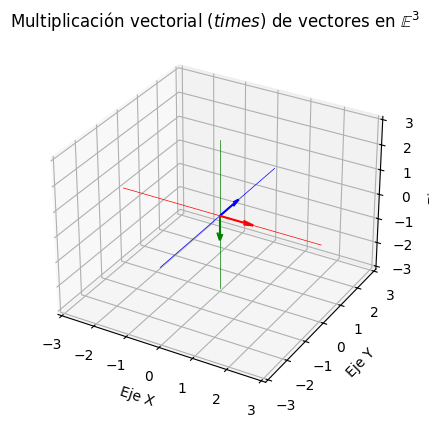

Vector resultante: [ 0  0 -1]


In [26]:
v1 = np.array([1, 0, 0]) # rojo
v2 = np.array([0, 1, 0]) # azul
v3 = np.cross(v2, v1) # verde

crearRejilla3D('Multiplicación vectorial ($times$) de vectores en $\mathbb{E}^3$')
plt.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='red', label='Vector')
plt.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='blue', label='Vector')
plt.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='green', label='Vector')

plt.show()

print("Vector resultante:", v3)

Recuerda, las direcciones siempre tienen que estar normalizadas, esto garantiza que los **vectores resultantes estén normalizados**.

------

Autor: **Germán Arroyo**

[Creative Commons BY 4.0](https://creativecommons.org/licenses/by/4.0/) ![](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)